## Análisis exploratorio

In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

In [2]:
%qtconsole

In [3]:
sldf = pd.read_csv('synergy_logistics_database.csv', index_col=0,parse_dates=[5])
sldf['month']=sldf['date'].dt.month #crea una columna que contiene el mes de la columna date
sldf['año_mes']=sldf['date'].dt.to_period('m') #resolución, que nos da una columna con los datos de año y mes
sldf
sldf.tail()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value,month,año_mes
register_id,,,,,,,,,,,
19052,Imports,Japan,Singapore,2020,2020-06-27,Gas turbines,Sea,Union Energy Co,1000000,6,2020-06
19053,Imports,Malaysia,Singapore,2020,2020-06-28,Gas turbines,Sea,Union Energy Co,2000000,6,2020-06
19054,Imports,Malaysia,Singapore,2020,2020-06-29,Gas turbines,Sea,Union Energy Co,33000000,6,2020-06
19055,Imports,Malaysia,Singapore,2020,2020-06-30,Gas turbines,Sea,Union Energy Co,13000000,6,2020-06
19056,Imports,Malaysia,Singapore,2020,2020-01-07,Gas turbines,Sea,Union Energy Co,30000000,1,2020-01


In [4]:
#sldf.dtypes

In [5]:
#sldf.info()
sldf.shape

(19056, 11)

## 1. Rutas de importación y exportación
### Synergy logistics está considerando la posibilidad de enfocar sus esfuerzos en las 10 rutas más demandadas. Acorde a los flujos de importación y exportación, ¿cuáles son esas 10 rutas? ¿le conviene implementar esa estrategia? ¿porqué?

In [6]:
valor_importaciones = sldf.groupby('destination')['total_value'].sum()
total_valor_importaciones = valor_importaciones.sum()
# valor_importaciones


In [7]:
#agrupar por las columnas que necesitamos
rutas = sldf.groupby(['direction','origin', 'destination', 'transport_mode'])

#generar la suma de los totales de cada ruta
suma =rutas.sum()['total_value']

#de forma descendente, ordenarel dataframe con las rutas por el conteo de las rutas
rutas = rutas['total_value'].describe().sort_values(by=['count'],ascending=False)

#añadir una columna con los valores totales y resetear el índice
rutas['suma_total']= suma
rutas= rutas.reset_index()
rutas.tail()

,direction,origin,destination,transport_mode,count,mean,std,min,25%,50%,75%,max,suma_total
210,Imports,Japan,India,Sea,8.0,1.437500e+07,1.114755e+07,1000000.0,2000000.0,18000000.0,21750000.0,29000000.0,115000000
211,Exports,France,Austria,Rail,7.0,1.000000e+03,1.290994e+03,0.0,0.0,0.0,2000.0,3000.0,7000
212,Imports,Brazil,Germany,Sea,6.0,1.266667e+07,6.022181e+06,1000000.0,12500000.0,14500000.0,16500000.0,17000000.0,76000000
213,Imports,Malaysia,Singapore,Sea,4.0,1.950000e+07,1.461734e+07,2000000.0,10250000.0,21500000.0,30750000.0,33000000.0,78000000
214,Exports,Netherlands,Belgium,Sea,1.0,8.000000e+06,NaN,8000000.0,8000000.0,8000000.0,8000000.0,8000000.0,8000000


In [8]:
exportaciones = sldf.groupby(['direction']).count()['origin']
exportaciones

direction
Exports    15408
Imports     3648
Name: origin, dtype: int64

In [9]:
# rutas de importaciones

#crear datasets por top de demanda y ganancia
rutas_importaciones= rutas[rutas['direction']=='Imports']
rutas_importaciones = rutas_importaciones[['origin','destination','transport_mode','count','suma_total']]
rutas_importaciones_demanda = rutas_importaciones.sort_values(by=['count'],ascending=False).head(10)
rutas_importaciones_ganancia = rutas_importaciones.sort_values(by=['suma_total'],ascending=False).head(10)

#variables de reporte
total_imp = int(rutas_importaciones['count'].sum())
total_imp_ganancia = rutas_importaciones['suma_total'].sum()
ganancia_top_demanda =rutas_importaciones_demanda['suma_total'].sum()
ganancia_top_ganancia = rutas_importaciones_ganancia.suma_total.sum()

print(f"Servicios totales en importaciones: {total_imp}")
print(f"Ganancias totales en importaciones: {total_imp_ganancia}")
print(f"Ganancias de rutas con mas demandas: {ganancia_top_demanda} que equivale al {round((ganancia_top_demanda/total_imp_ganancia)*100,2)} %")
print(f"Ganancias de rutas con mas ganancias: {ganancia_top_ganancia} que equivale al {round((ganancia_top_ganancia/total_imp_ganancia)*100,2)} %")

Servicios totales en importaciones: 3648
Ganancias totales en importaciones: 55528000000
Ganancias de rutas con mas demandas: 26150000000 que equivale al 47.09 %
Ganancias de rutas con mas ganancias: 28943000000 que equivale al 52.12 %


In [32]:
rutas_importaciones_demanda

,origin,destination,transport_mode,count,suma_total
7,Singapore,Thailand,Sea,273.0,4017000000
12,Germany,China,Sea,233.0,1328000000
16,China,Japan,Air,210.0,3237000000
17,Japan,Mexico,Sea,206.0,3918000000
22,Malaysia,Thailand,Rail,195.0,3482000000
33,China,Thailand,Road,145.0,2786000000
38,Spain,Germany,Road,142.0,2044000000
48,China,United Arab Emirates,Sea,114.0,3357000000
51,Brazil,China,Sea,113.0,413000000
56,USA,Thailand,Sea,109.0,1568000000


In [33]:
rutas_importaciones_ganancia

,origin,destination,transport_mode,count,suma_total
7,Singapore,Thailand,Sea,273.0,4017000000
17,Japan,Mexico,Sea,206.0,3918000000
22,Malaysia,Thailand,Rail,195.0,3482000000
48,China,United Arab Emirates,Sea,114.0,3357000000
16,China,Japan,Air,210.0,3237000000
33,China,Thailand,Road,145.0,2786000000
95,Japan,United Arab Emirates,Sea,76.0,2238000000
79,Mexico,USA,Rail,93.0,2060000000
38,Spain,Germany,Road,142.0,2044000000
104,Germany,Mexico,Sea,70.0,1804000000


In [10]:
# rutas de exportaciones
#crear datasets por top de demanda y ganancia

rutas_exportaciones= rutas[rutas['direction']=='Exports']
rutas_exportaciones = rutas_exportaciones[['origin','destination','transport_mode','count','suma_total']]
rutas_exportaciones_demanda = rutas_exportaciones.sort_values(by=['count'],ascending=False).head(10)
rutas_exportaciones_ganancia = rutas_exportaciones.sort_values(by=['suma_total'],ascending=False).head(10)

#variables de reporte
total_exp = rutas_exportaciones['count'].sum()
total_exp_ganancia = rutas_exportaciones['suma_total'].sum()
ganancia_top_demanda =rutas_exportaciones_demanda['suma_total'].sum()
ganancia_top_ganancia = rutas_exportaciones_ganancia.suma_total.sum()

print(f"Servicios totales en exportaciones: {total_exp}")
print(f"Ganancias totales en exportaciones: {total_exp_ganancia}")
print(f"Ganancias de rutas con mas demandas: {ganancia_top_demanda} que equivale al {round((ganancia_top_demanda/total_exp_ganancia)*100,2)} %")
print(f"Ganancias de rutas con mas ganancias: {ganancia_top_ganancia} que equivale al {round((ganancia_top_ganancia/total_exp_ganancia)*100,2)} %")

Servicios totales en exportaciones: 15408.0
Ganancias totales en exportaciones: 160163298000
Ganancias de rutas con mas demandas: 45058657000 que equivale al 28.13 %
Ganancias de rutas con mas ganancias: 58647007000 que equivale al 36.62 %


In [34]:
rutas_exportaciones_demanda

,origin,destination,transport_mode,count,suma_total
0,South Korea,Vietnam,Sea,497.0,6877007000
1,USA,Netherlands,Sea,436.0,1032187000
2,Netherlands,Belgium,Road,374.0,3230094000
3,China,Mexico,Air,330.0,12250000000
4,Japan,Brazil,Sea,306.0,3368155000
5,Germany,France,Road,299.0,2902214000
6,South Korea,Japan,Sea,279.0,4594000000
8,Australia,Singapore,Sea,273.0,493000000
9,Canada,Mexico,Rail,261.0,8450000000
10,China,Spain,Air,250.0,1862000000


In [35]:
rutas_exportaciones_ganancia

,origin,destination,transport_mode,count,suma_total
3,China,Mexico,Air,330.0,12250000000
9,Canada,Mexico,Rail,261.0,8450000000
0,South Korea,Vietnam,Sea,497.0,6877007000
31,France,United Kingdom,Sea,147.0,5427000000
6,South Korea,Japan,Sea,279.0,4594000000
34,China,South Korea,Rail,144.0,4535000000
27,USA,Mexico,Rail,178.0,4370000000
63,France,Belgium,Road,105.0,4257000000
37,China,Germany,Air,142.0,4090000000
53,China,USA,Air,111.0,3797000000


## 2. Medio de transporte utilizado
### ¿Cúales son los medios de transporte más importantes para Synergy logistics considerando el valor de las importaciones y exportaciones? ¿Cuál es el medio de transporte que podrían reducir?

In [11]:
#ubicar los medios de transporte
print(rutas['transport_mode'].unique())

['Sea' 'Road' 'Air' 'Rail']


In [12]:
#calcular los totales monetarios de cada medio de transporte
valor_transporte_group = rutas.groupby('transport_mode').sum()
valor_transporte_group=valor_transporte_group.reset_index()
valor_transporte_group[['transport_mode','suma_total']]

,transport_mode,suma_total
0,Air,38262147000
1,Rail,43628043000
2,Road,33270486000
3,Sea,100530622000


In [13]:
#transporte importaciones
valor_transporte_imports = rutas_importaciones.groupby('transport_mode').sum()
valor_transporte_imports['suma_total']= valor_transporte_imports['suma_total'].apply(lambda x: "${:,.2f}".format((x)))
valor_transporte_imports.reset_index()


,transport_mode,count,suma_total
0,Air,344.0,"$5,477,000,000.00"
1,Rail,601.0,"$9,123,000,000.00"
2,Road,449.0,"$5,990,000,000.00"
3,Sea,2254.0,"$34,938,000,000.00"


In [14]:
#transporte exortaciones
valor_transporte_exports = rutas_exportaciones.groupby('transport_mode').sum()
valor_transporte_exports['suma_total']= valor_transporte_exports['suma_total'].apply(lambda x: "${:,.2f}".format((x)))
valor_transporte_exports.reset_index().sort_values



,transport_mode,count,suma_total
0,Air,2045.0,"$32,785,147,000.00"
1,Rail,2780.0,"$34,505,043,000.00"
2,Road,2149.0,"$27,280,486,000.00"
3,Sea,8434.0,"$65,592,622,000.00"


In [53]:
#crear dataframe con los totales de cada cosa para cada transporte
valor_transporte = pd.DataFrame()
valor_transporte['Transport']=valor_transporte_exports.index
valor_transporte['Total_imports']=valor_transporte_imports['count'].values
valor_transporte['Total_exports']=valor_transporte_exports['count'].values
valor_transporte['Total_imports_value']=valor_transporte_imports['suma_total'].values
valor_transporte['Total_exports_value']=valor_transporte_exports['suma_total'].values
valor_transporte['Valor_total'] = valor_transporte_group['suma_total']
valor_transporte=valor_transporte.sort_values('Valor_total',ascending=False)
valor_transporte['Valor_total'] = valor_transporte['Valor_total'].apply(lambda x: "${:,.2f}".format((x)))
valor_transporte

,Transport,Total_imports,Total_exports,Total_imports_value,Total_exports_value,Valor_total
3,Sea,2254.0,8434.0,"$34,938,000,000.00","$65,592,622,000.00","$100,530,622,000.00"
1,Rail,601.0,2780.0,"$9,123,000,000.00","$34,505,043,000.00","$43,628,043,000.00"
0,Air,344.0,2045.0,"$5,477,000,000.00","$32,785,147,000.00","$38,262,147,000.00"
2,Road,449.0,2149.0,"$5,990,000,000.00","$27,280,486,000.00","$33,270,486,000.00"


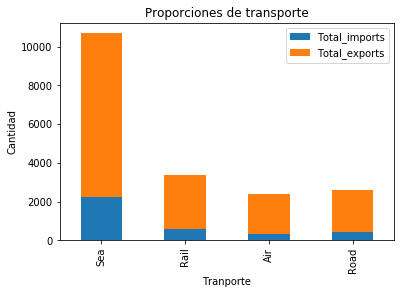

In [86]:
valor_transporte.plot(kind='bar', x ='Transport',stacked=True)
plt.title(u"Proporciones de transporte")
plt.ylabel(u"Cantidad")
plt.xlabel(u"Tranporte")
plt.show()

## 3. Valor total de de importaciones y exportaciones
### Si synergy logistics quisiera enfocarse en los países que le generan el 80% del vlor de las exportaciones e importaciones, ¿en qué grupo de países debería enfocar sus esfuerzos?



In [16]:
#rutas.groupby('origin')['suma_total'].sum()

In [17]:
#dataframe que obtiene num de veces que ocurre una ruta, su ganancia, 
# ganancia acumulada y procentaje acumulado de acuerdo a las ganancias totales por importacion

rutas_importaciones= rutas[rutas['direction']=='Imports']
rutas_importaciones = rutas_importaciones[['origin','destination','transport_mode','count','suma_total']]
rutas_importaciones=rutas_importaciones.sort_values(by=['suma_total'],ascending=False)
#rutas_importaciones['suma_total']= rutas_importaciones['suma_total'].apply(lambda x: "${:,.2f}".format((x)))
dict_rutas_importaciones=dict(rutas_importaciones.groupby('origin')['suma_total'].sum())
rutas_importaciones['cumsum'] = rutas_importaciones['suma_total'].cumsum()
rutas_importaciones['porcentaje'] = rutas_importaciones['suma_total']/total_imp_ganancia*100
rutas_importaciones['porcentaje_acumulado'] = rutas_importaciones['suma_total'].cumsum()/total_imp_ganancia*100

rutas_importaciones.head()


,origin,destination,transport_mode,count,suma_total,cumsum,porcentaje,porcentaje_acumulado
7,Singapore,Thailand,Sea,273.0,4017000000,4017000000,7.234188,7.234188
17,Japan,Mexico,Sea,206.0,3918000000,7935000000,7.055900,14.290088
22,Malaysia,Thailand,Rail,195.0,3482000000,11417000000,6.270710,20.560798
48,China,United Arab Emirates,Sea,114.0,3357000000,14774000000,6.045599,26.606397
16,China,Japan,Air,210.0,3237000000,18011000000,5.829491,32.435888


In [18]:
df_origin_imports = pd.DataFrame(rutas_importaciones.groupby('origin')['porcentaje'].sum()).sort_values('porcentaje',ascending=False).reset_index()
df_origin_imports['porcentaje_acumulado'] = df_origin_imports['porcentaje'].cumsum()
df_origin_imports = df_origin_imports[df_origin_imports['porcentaje_acumulado']<85]
df_origin_imports

,origin,porcentaje,porcentaje_acumulado
0,China,22.030327,22.030327
1,Japan,14.576430,36.606757
2,USA,9.528526,46.135283
3,Mexico,8.321928,54.457211
4,Germany,7.653796,62.111007
5,Singapore,7.234188,69.345195
6,South Korea,7.003674,76.348869
7,Malaysia,6.411180,82.760049


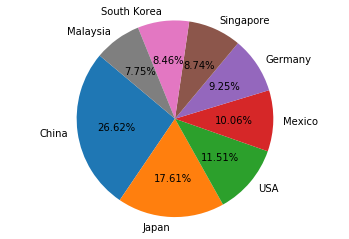

In [70]:
labels = df_origin_imports['origin']
sizes = df_origin_imports['porcentaje']

plt.pie(sizes,labels=labels,autopct='%1.2f%%',shadow=False,startangle=140)
plt.axis('equal')
plt.show()

In [71]:
#porcentajes de exportaciones

rutas_exportaciones= rutas[rutas['direction']=='Exports']
rutas_exportaciones = rutas_exportaciones[['origin','destination','transport_mode','count','suma_total']]
rutas_exportaciones=rutas_exportaciones.sort_values(by=['suma_total'],ascending=False)
#rutas_importaciones['suma_total']= rutas_importaciones['suma_total'].apply(lambda x: "${:,.2f}".format((x)))

rutas_exportaciones['cumsum'] = rutas_exportaciones['suma_total'].cumsum()
rutas_exportaciones['porcentaje'] = rutas_exportaciones['suma_total']/total_exp_ganancia*100
rutas_exportaciones['porcentaje_acumulado'] = rutas_exportaciones['suma_total'].cumsum()/total_exp_ganancia*100

rutas_importaciones.head()



,origin,destination,transport_mode,count,suma_total,cumsum,porcentaje,porcentaje_acumulado
7,Singapore,Thailand,Sea,273.0,4017000000,4017000000,7.234188,7.234188
17,Japan,Mexico,Sea,206.0,3918000000,7935000000,7.055900,14.290088
22,Malaysia,Thailand,Rail,195.0,3482000000,11417000000,6.270710,20.560798
48,China,United Arab Emirates,Sea,114.0,3357000000,14774000000,6.045599,26.606397
16,China,Japan,Air,210.0,3237000000,18011000000,5.829491,32.435888


In [72]:
df_origin_exports = pd.DataFrame(rutas_exportaciones.groupby('origin')['porcentaje'].sum()).sort_values('porcentaje',ascending=False).reset_index()
df_origin_exports['porcentaje_acumulado'] = df_origin_exports['porcentaje'].cumsum()
df_origin_exports = df_origin_exports[df_origin_exports['porcentaje_acumulado']<85]
df_origin_exports

,origin,porcentaje,porcentaje_acumulado
0,China,20.589640,20.589640
1,France,11.622096,32.211736
2,USA,11.460370,43.672105
3,South Korea,9.128899,52.801004
4,Russia,8.255949,61.056953
5,Japan,7.460496,68.517449
6,Germany,7.082292,75.599741
7,Canada,6.670692,82.270433


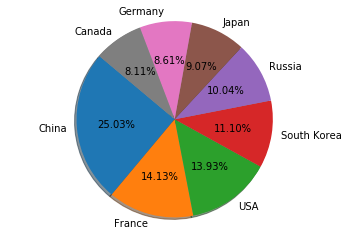

In [73]:
#Gráfica de pastel, la cual representa un 80% de las ganancias en exportaciones y la porción que cada país representa del 100%
labels = df_origin_exports['origin']
sizes = df_origin_exports['porcentaje']

plt.pie(sizes,labels=labels,autopct='%1.2f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.show()